# Preprocesado de los datos


## Importamos el dataset





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [ ]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
california_housing.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
res = california_housing.frame[california_housing.frame < 1 ].count()

# Display result
print("Result:\n",res)

Result:
 MedInc           155
HouseAge           0
AveRooms           2
AveBedrms       4395
Population         0
AveOccup           3
Latitude           0
Longitude      20640
MedHouseVal     3596
dtype: int64


Antes de continuar, me he dado cuenta de que al estar el valor medio de las casas, representado en cientos de miles de dolares, cuando le paso la función logaritmo para normalizar, los valores que están entre 0 y 1 se vuelven negativos, y esto no es deseable a la hora de realizar predicciones sobre los valores que nos devuelve el modelo, ni al pasar los datos por el modelo, asi que para solucionarlo voy a multiplicar la columna 'MedHouseVal' por 10, así los valores entre 0 y 1 pasarán a estar entre 1 y 10, y no supondrán un problema.

Esto también es aplicable a las columnas MedInc, AveRooms, AveBedrms,  y AveOccup, ya que son medias de valores, así que también aplicaremos este arreglo a esas columnas

In [ ]:
california_housing.frame['MedInc'] = 10*(california_housing.frame['MedInc'])
california_housing.frame['AveRooms'] = 10*(california_housing.frame['AveRooms'])
california_housing.frame['AveBedrms'] = 10*(california_housing.frame['AveBedrms'])
california_housing.frame['AveOccup'] = 10*(california_housing.frame['AveOccup'])
california_housing.frame['MedHouseVal'] = 10*(california_housing.frame['MedHouseVal'])

Tenemos que tener en cuenta que debido a esto, más adelante vamos a tener que dividir estas columnas entre 10, si queremos volver a interpretar los resultados en la misma magnitud en la que se encontraban originalmente

Cabe añadir, que al haber hecho esta transformación en todas nuestras filas, la correlacionn entre unas y otras queda igual, asi que no debería causar ningun problema en este sentido.

## Manejo de datos missing


In [ ]:
california_housing.frame.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

No tenemos ningun dato null en el dataset, por lo que no es necesario ningun tipo de manejo de datos missing


## Manejo de datos categóricos

En este caso, nuestro dataset no contiene datos categóricos, asi que no aplica su manejo

## Estandarizacion y normalizacion de datos

### Estandarizacion

Empezamos con una representacion general de todos los datos

In [ ]:
california_df = california_housing.frame

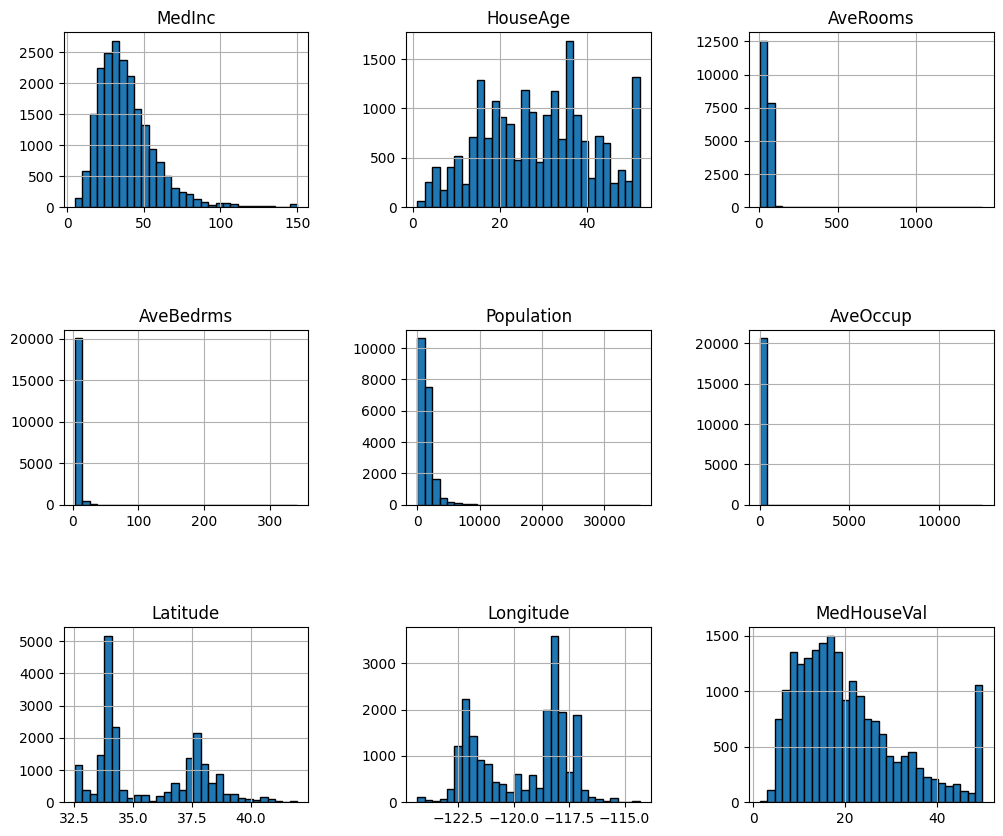

In [ ]:
california_df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

A continuación vamos a estudiar la kurtosis y skewness de los mismos, y a tratar de mejorarla, aplicando la función logaritmos a nuestros datos

<ipython-input-182-8712ff4df3fc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(california_df['HouseAge'], hist = True, kde = True)


0.060330637599136865
-0.800628853586641


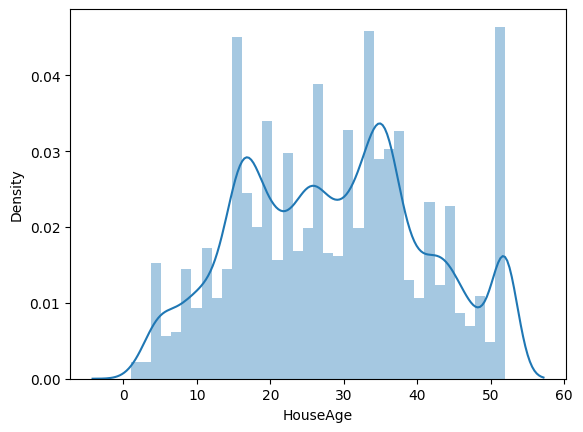

In [ ]:
sns.distplot(california_df['HouseAge'], hist = True, kde = True)
print(california_df['HouseAge'].skew())
print(california_df['HouseAge'].kurt())

<ipython-input-183-6b5fde630154>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(california_df['HouseAge'], hist = True, kde = True)


-1.2891698416719752
2.1247935855570677


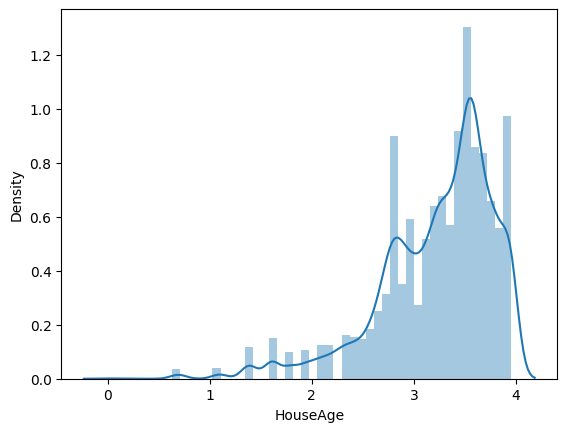

In [ ]:
california_df['HouseAge'] = np.log(california_df['HouseAge'])
sns.distplot(california_df['HouseAge'], hist = True, kde = True)
print(california_df['HouseAge'].skew())
print(california_df['HouseAge'].kurt())

<ipython-input-184-0e1536a76bc5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(california_df['MedInc'], hist = True, kde = True)


1.6466567021344476
4.9525241019915125


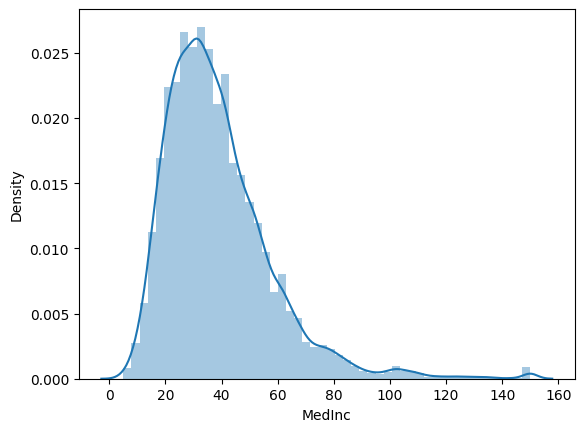

In [ ]:
sns.distplot(california_df['MedInc'], hist = True, kde = True)
print(california_df['MedInc'].skew())
print(california_df['MedInc'].kurt())

<ipython-input-185-e2527e5966f2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(california_df['MedInc'], hist = True, kde = True)


-0.14608181157738842
0.3914135628357407


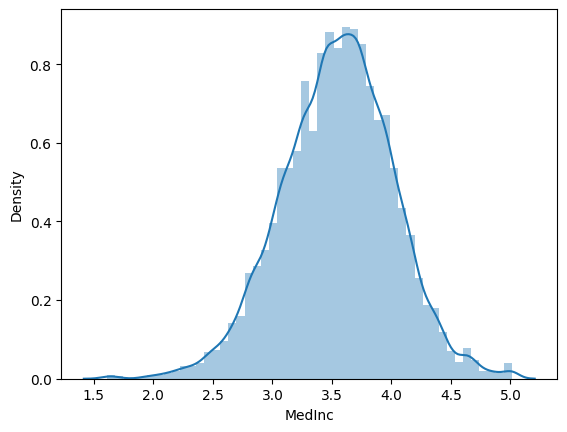

In [ ]:
california_df['MedInc'] = np.log(california_df['MedInc'])
sns.distplot(california_df['MedInc'], hist = True, kde = True)
print(california_df['MedInc'].skew())
print(california_df['MedInc'].kurt())

<ipython-input-186-42766cfd2ad2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(california_df['AveBedrms'], hist = True, kde = True)


31.316956246782667
1636.711971777679


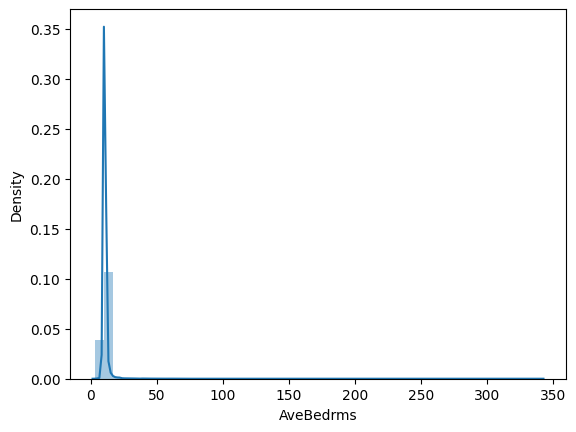

In [ ]:
sns.distplot(california_df['AveBedrms'], hist = True, kde = True)
print(california_df['AveBedrms'].skew())
print(california_df['AveBedrms'].kurt())

<ipython-input-187-056725cdb47a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(california_df['AveBedrms'], hist = True, kde = True)


6.406004149216983
69.97561818048105


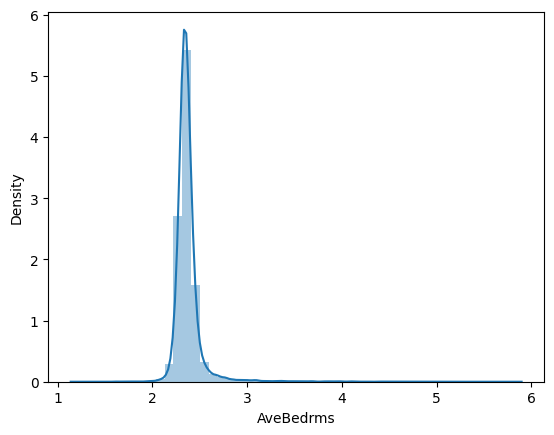

In [ ]:
california_df['AveBedrms'] = np.log(california_df['AveBedrms'])
sns.distplot(california_df['AveBedrms'], hist = True, kde = True)
print(california_df['AveBedrms'].skew())
print(california_df['AveBedrms'].kurt())

<ipython-input-188-a731fc737a4b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(california_df['AveRooms'], hist = True, kde = True)


20.69786895671065
879.3532639756768


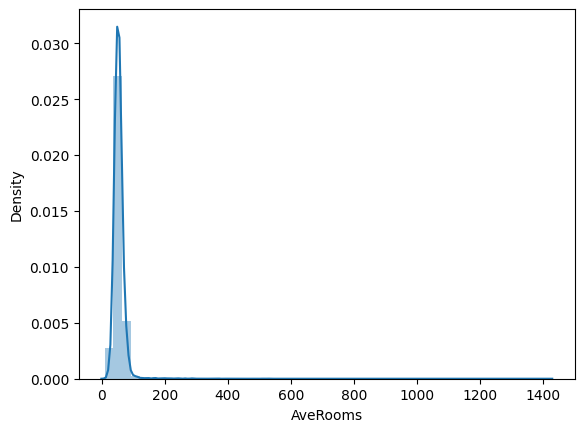

In [ ]:
sns.distplot(california_df['AveRooms'], hist = True, kde = True)
print(california_df['AveRooms'].skew())
print(california_df['AveRooms'].kurt())

<ipython-input-189-fc7b6b9c2397>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(california_df['AveRooms'], hist = True, kde = True)


0.8680607951109411
8.900595915151026


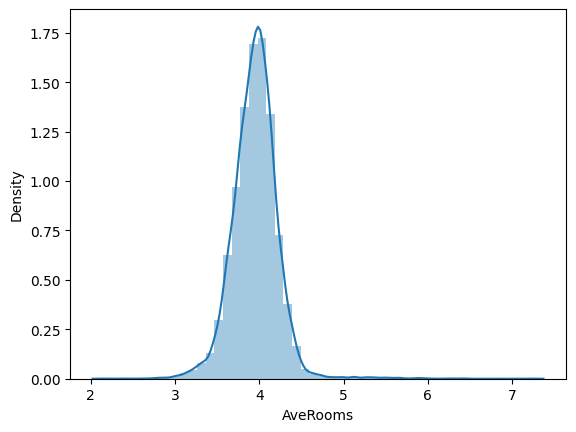

In [ ]:
california_df['AveRooms'] = np.log(california_df['AveRooms'])
sns.distplot(california_df['AveRooms'], hist = True, kde = True)
print(california_df['AveRooms'].skew())
print(california_df['AveRooms'].kurt())

<ipython-input-190-8d53fba17ee0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(california_df['Population'], hist = True, kde = True)


4.93585822672712
73.55311639416514


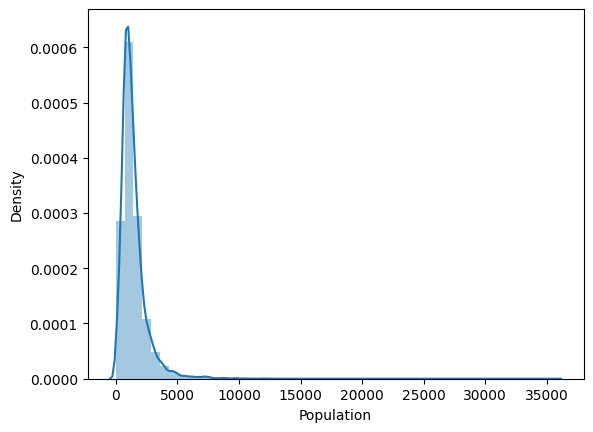

In [ ]:
sns.distplot(california_df['Population'], hist = True, kde = True)
print(california_df['Population'].skew())
print(california_df['Population'].kurt())

<ipython-input-191-5069f6f5594a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(california_df['Population'], hist = True, kde = True)


-1.070786100914493
4.6701933809219085


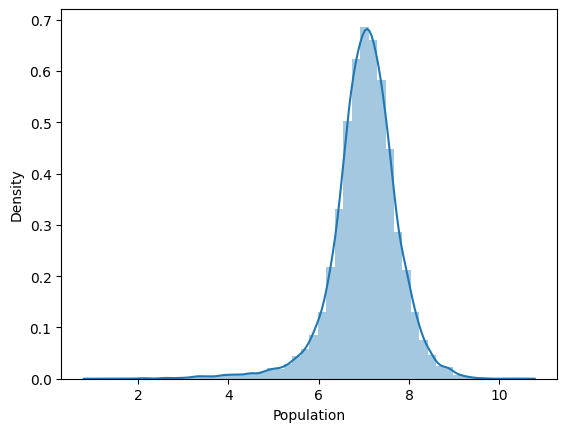

In [ ]:
california_df['Population'] = np.log(california_df['Population'])
sns.distplot(california_df['Population'], hist = True, kde = True)
print(california_df['Population'].skew())
print(california_df['Population'].kurt())

<ipython-input-192-bc0b60aa3b12>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(california_df['AveOccup'], hist = True, kde = True)


97.63956096369483
10651.010636167392


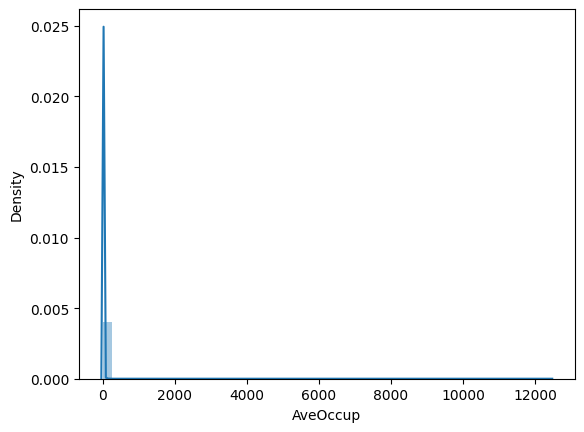

In [ ]:
sns.distplot(california_df['AveOccup'], hist = True, kde = True)
print(california_df['AveOccup'].skew())
print(california_df['AveOccup'].kurt())

<ipython-input-193-7740ad919eca>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(california_df['AveOccup'], hist = True, kde = True)


2.1275987743502807
34.634322362765374


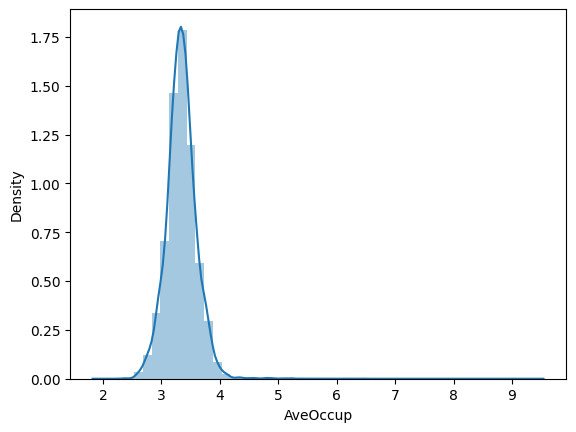

In [ ]:
california_df['AveOccup'] = np.log(california_df['AveOccup'])
sns.distplot(california_df['AveOccup'], hist = True, kde = True)
print(california_df['AveOccup'].skew())
print(california_df['AveOccup'].kurt())

<ipython-input-194-5fb32c694d6e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(california_df['MedHouseVal'], hist = True, kde = True)


0.9777632739098339
0.3278702429465876


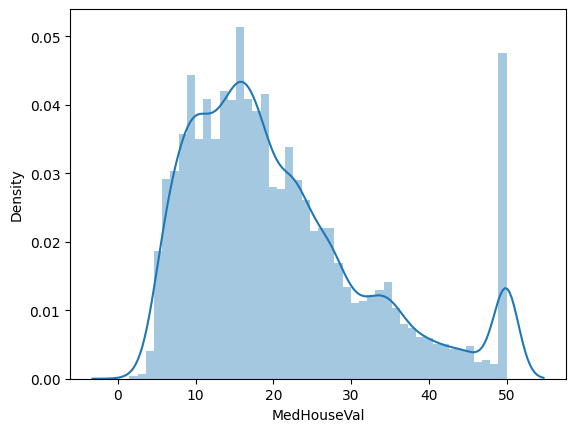

In [ ]:
sns.distplot(california_df['MedHouseVal'], hist = True, kde = True)
print(california_df['MedHouseVal'].skew())
print(california_df['MedHouseVal'].kurt())

<ipython-input-195-a50143fc14b9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(california_df['MedHouseVal'], hist = True, kde = True)


-0.1731753903249653
-0.4262407915034174


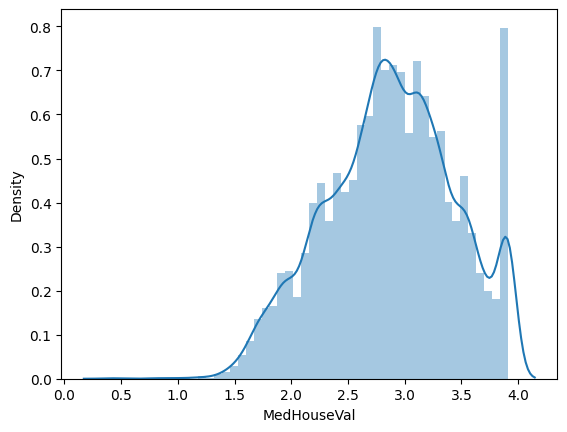

In [ ]:
california_df['MedHouseVal'] = np.log(california_df['MedHouseVal'])
sns.distplot(california_df['MedHouseVal'], hist = True, kde = True)
print(california_df['MedHouseVal'].skew())
print(california_df['MedHouseVal'].kurt())

Realizamos las transformaciones que mejoran la skewness y kurtosis de nuestros datos

In [ ]:
california_df['MedInc'] = np.log(california_df['MedInc'])
california_df['AveBedrms'] = np.log(california_df['AveBedrms'])
california_df['Population'] = np.log(california_df['Population'])
california_df['AveRooms'] = np.log(california_df['AveRooms'])
california_df['AveOccup'] = np.log(california_df['AveOccup'])
california_df['MedHouseVal'] = np.log(california_df['MedHouseVal'])

In [ ]:
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.421872,41.0,4.246225,2.326116,5.774552,3.240855,37.88,-122.23,3.812424
1,4.419009,21.0,4.133267,2.274063,7.783641,3.049198,37.86,-122.22,3.579344
2,4.284607,52.0,4.417410,2.373459,6.206576,3.333011,37.85,-122.24,3.561330
3,4.033019,52.0,4.063430,2.373099,6.324359,3.237872,37.85,-122.25,3.530177
4,3.649671,52.0,4.140250,2.380547,6.336826,3.082583,37.85,-122.25,3.532810
...,...,...,...,...,...,...,...,...,...
20635,2.747463,25.0,3.921073,2.427748,6.739337,3.242829,39.48,-121.09,2.055405
20636,3.241342,18.0,4.113172,2.577022,5.874931,3.441317,39.49,-121.21,2.042518
20637,2.833213,17.0,3.952309,2.415996,6.914731,3.146578,39.43,-121.22,2.222459
20638,2.927025,18.0,3.975845,2.461228,6.608001,3.055514,39.43,-121.32,2.136531


Y volvemos a representarlos

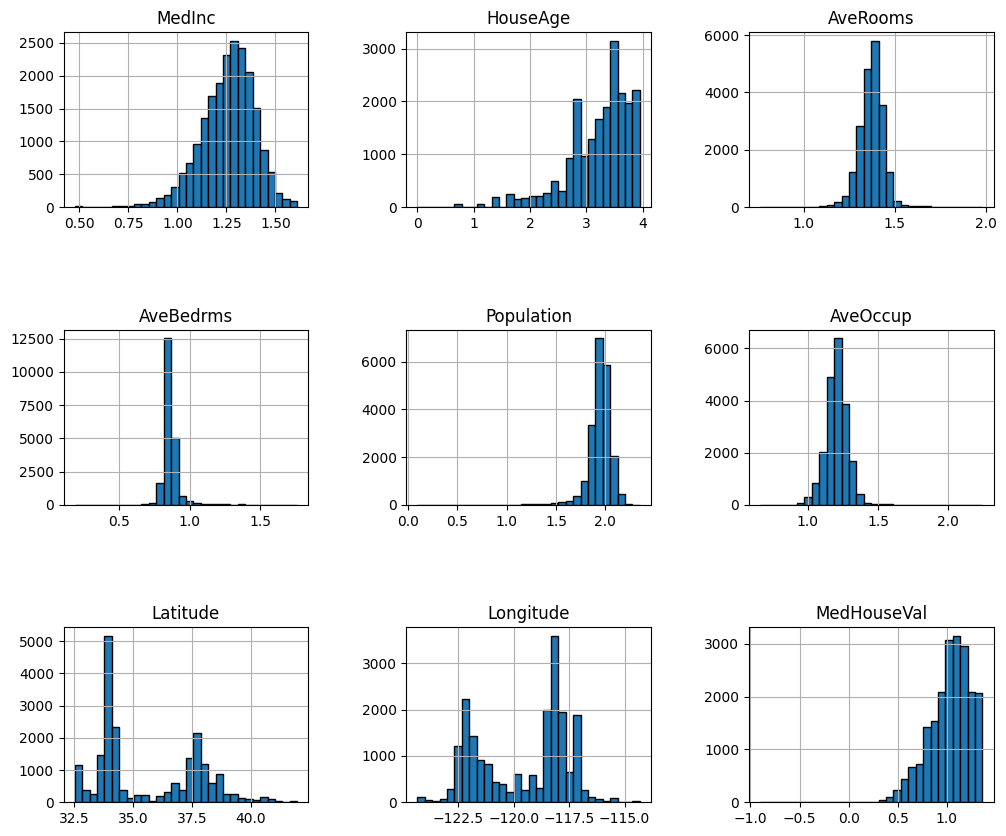

In [ ]:
california_df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

### Normalizacion

La normalización de los datos la vamos a aplicar justo antes de pasarlos al algoritmo, para así poder controlar mejor qué datos están normalizados y cuales no, y poder desnormalizarlos de forma correcta a la hora de interpretar nuestras predicciones.

## Separación de datos para los distintos algoritmos

In [ ]:
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.421872,41.0,4.246225,2.326116,5.774552,3.240855,37.88,-122.23,3.812424
1,4.419009,21.0,4.133267,2.274063,7.783641,3.049198,37.86,-122.22,3.579344
2,4.284607,52.0,4.417410,2.373459,6.206576,3.333011,37.85,-122.24,3.561330
3,4.033019,52.0,4.063430,2.373099,6.324359,3.237872,37.85,-122.25,3.530177
4,3.649671,52.0,4.140250,2.380547,6.336826,3.082583,37.85,-122.25,3.532810
...,...,...,...,...,...,...,...,...,...
20635,2.747463,25.0,3.921073,2.427748,6.739337,3.242829,39.48,-121.09,2.055405
20636,3.241342,18.0,4.113172,2.577022,5.874931,3.441317,39.49,-121.21,2.042518
20637,2.833213,17.0,3.952309,2.415996,6.914731,3.146578,39.43,-121.22,2.222459
20638,2.927025,18.0,3.975845,2.461228,6.608001,3.055514,39.43,-121.32,2.136531


Generamos una copia de nuestro dataframe para utilizar con la regresión lineal simple. Elegimos la columna MedInc, ya que es la que mayor relación tiene con nuestra variable objetivo

In [ ]:
df_simple = california_df[['MedInc','MedHouseVal']].copy()
df_simple

,MedInc,MedHouseVal
0,4.421872,3.812424
1,4.419009,3.579344
2,4.284607,3.561330
3,4.033019,3.530177
4,3.649671,3.532810
...,...,...
20635,2.747463,2.055405
20636,3.241342,2.042518
20637,2.833213,2.222459
20638,2.927025,2.136531


Separamos la x y la y para la regresion multiple y simple

In [ ]:
# explore de dataset
#california_housing
X_multiple = california_df.iloc[:, :8].values
y_multiple = california_df.iloc[:, 8:].values

X_simple = df_simple.iloc[:, :1].values
y_simple = df_simple.iloc[:, 1:].values

print(X_multiple)
print(y_multiple)

[[   4.42187215   41.            4.24622509 ...    3.24085473
    37.88       -122.23      ]
 [   4.41900927   21.            4.13326669 ...    3.04919807
    37.86       -122.22      ]
 [   4.28460673   52.            4.41741014 ...    3.33301129
    37.85       -122.24      ]
 ...
 [   2.83321334   17.            3.95230906 ...    3.14657826
    39.43       -121.22      ]
 [   2.92702508   18.            3.97584494 ...    3.0555138
    39.43       -121.32      ]
 [   3.17329251   16.            3.96171124 ...    3.26460651
    39.37       -121.24      ]]
[[3.81242364]
 [3.57934357]
 [3.56133013]
 ...
 [2.22245905]
 [2.13653051]
 [2.19053559]]


In [ ]:
print(X_simple)
print(y_simple)

[[4.42187215]
 [4.41900927]
 [4.28460673]
 ...
 [2.83321334]
 [2.92702508]
 [3.17329251]]
[[3.81242364]
 [3.57934357]
 [3.56133013]
 ...
 [2.22245905]
 [2.13653051]
 [2.19053559]]


## Separación de datos en entrenamiento y test

In [ ]:
from sklearn.model_selection import train_test_split
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size = 1/3, random_state = 0)
print(X_train_simple)
print(X_test_simple)
print(y_train_simple)
print(y_test_simple)

[[3.92911608]
 [4.24756624]
 [3.58415762]
 ...
 [3.46501689]
 [4.03096093]
 [2.63059304]]
[[3.72612707]
 [4.05691957]
 [3.77246204]
 ...
 [3.73239382]
 [2.78012277]
 [3.0668429 ]]
[[3.26308408]
 [3.6519561 ]
 [2.78377591]
 ...
 [3.36487912]
 [3.88073872]
 [1.93730177]]
[[2.61666564]
 [3.18345588]
 [2.99922616]
 ...
 [2.76694784]
 [2.84141491]
 [2.14358936]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size = 1/3, random_state = 0)
print(X_train_multiple)
print(X_test_multiple)
print(y_train_multiple)
print(y_test_multiple)

[[   3.92911608   37.            3.96671592 ...    3.26328058
    34.23       -118.25      ]
 [   4.24756624   22.            4.2460129  ...    3.18886689
    34.14       -118.82      ]
 [   3.58415762   37.            3.75255751 ...    3.52564071
    34.3        -118.43      ]
 ...
 [   3.46501689   31.            3.59490426 ...    2.88555384
    36.58       -121.9       ]
 [   4.03096093   34.            3.81564388 ...    3.11256519
    33.62       -117.93      ]
 [   2.63059304   15.            3.67110497 ...    3.53696341
    32.8        -115.56      ]]
[[   3.72612707   22.            4.03655173 ...    3.73303819
    32.58       -117.05      ]
 [   4.05691957   32.            4.11205777 ...    3.40816605
    33.92       -117.97      ]
 [   3.77246204   29.            4.0827293  ...    3.37077678
    38.65       -121.84      ]
 ...
 [   3.73239382   10.            4.06351598 ...    3.6384486
    34.03       -117.64      ]
 [   2.78012277   41.            3.57283522 ...    3.2470467

## Estandarización de los datos de entrada

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_simple = StandardScaler()
X_train_scaled_simple = scaler_simple.fit_transform(X_train_simple)
X_test_scaled_simple = scaler_simple.transform(X_test_simple)

In [ ]:
stdscl_y = StandardScaler()
y_poly = stdscl_y.fit_transform(y_train_multiple)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_multiple = StandardScaler()
X_train_scaled_multiple = scaler_multiple.fit_transform(X_train_multiple)
X_test_scaled_multiple = scaler_multiple.transform(X_test_multiple)

# EDA Básico


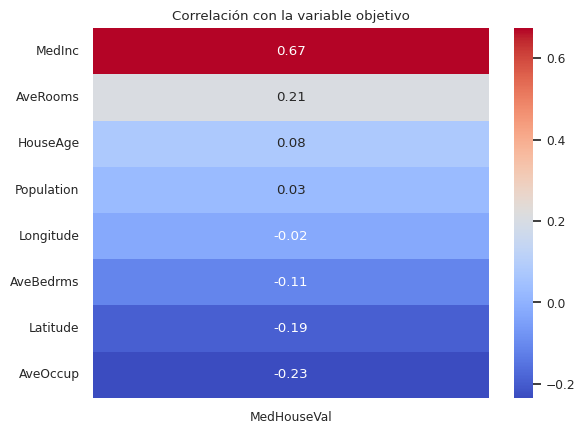

In [ ]:
corr_EDA = california_housing.frame.corr()
target_corr = corr_EDA['MedHouseVal'].drop('MedHouseVal')

# Ponemos los valores de correlacion en orden descendente
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlación con la variable objetivo')
plt.show()

En este gráfico podemos observar las variables con mayor correlación con nuestra variable objetivo.
Las Variables AveOccup y MedInc van a tener mucha importancia a la hora de realizar predicciones sobre nuestra variable objetivo

<Axes: >

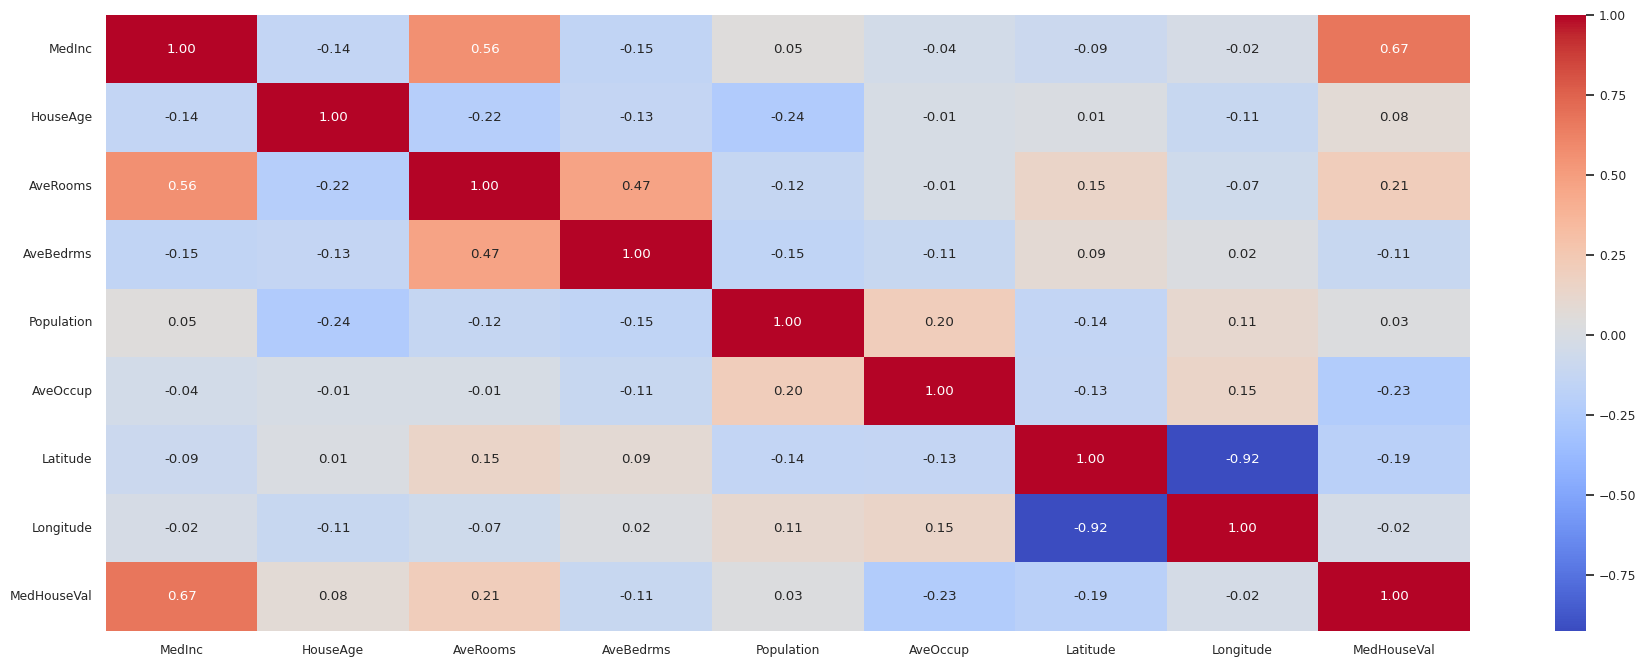

In [ ]:
corr = california_df.corr()
fig, ax = plt.subplots(figsize = (22, 8))

sns.heatmap(corr, annot=True, fmt = '.2f', cmap="coolwarm")

Las variables AveRooms y MedInc tienen una correlación alta, esto tiene sentido, ya que las familias con mayor poder adquisitivo, se pueden permitir casas más grandes y con mas habitaciones.

Las variables AveBedrms y AveRooms tienen una correlación alta, esto tiene sentido, ya que una casa con más dormitorios, por definición también tiene más habitaciones.

Las variables MedHouseVal y MedInc también tienen una correlación positiva  alta, también es lógico, ya que las familias con una mayor renta, pueden optar a comprar casas más caras.

La alta correlación entre la longitud y la latitud es obvia, ya que son datos que representan una posición en el mapa.

# Aplicar algoritmos de Regresión lineal o Regresión lineal múltiple o Regresión polinomial y generar predicciones para nuevos valores.


## Regresión lineal simple

In [ ]:
# Create linear regression object
from sklearn.linear_model import LinearRegression
regr_simple_train = LinearRegression()

# Train the model using the training sets
regr_simple_train.fit(X_train_scaled_simple, y_train_simple)

LinearRegression()

In [ ]:
import sklearn.metrics as metrics
# Make predictions using the testing set
y_pred_test = regr_simple_train.predict(X_test_scaled_simple)

# The coefficients
print('Slope: \n', regr_simple_train.coef_)
print('Intercept: \n', regr_simple_train.intercept_)

from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f" %mean_squared_error(y_test_simple, y_pred_test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' %r2_score(y_test_simple, y_pred_test))
#R2
print('Coefficient of determination (R2): %.2f' % metrics.r2_score(y_test_simple, y_pred_test))


Slope: 
 [[0.38324313]]
Intercept: 
 [2.87562767]
Mean squared error: 0.18
Variance score: 0.45192
Coefficient of determination (R2): 0.45


In [ ]:
# Make predictions using the testing set
y_pred_test = regr_simple_train.predict(X_test_scaled_simple)
print(y_pred_test)
print(y_test_simple)


[[3.02224279]
 [3.29154385]
 [3.0599645 ]
 ...
 [3.02734461]
 [2.25209245]
 [2.4855138 ]]
[[2.61666564]
 [3.18345588]
 [2.99922616]
 ...
 [2.76694784]
 [2.84141491]
 [2.14358936]]


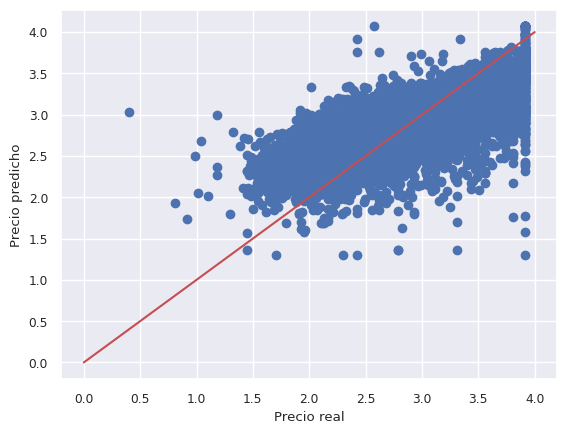

In [ ]:
x = np.linspace(0, 4, 3)
plt.scatter(x = y_test_simple, y = y_pred_test)
plt.plot(x, x, 'r-')

plt.xlabel('Precio real')
plt.ylabel('Precio predicho')

plt.show()

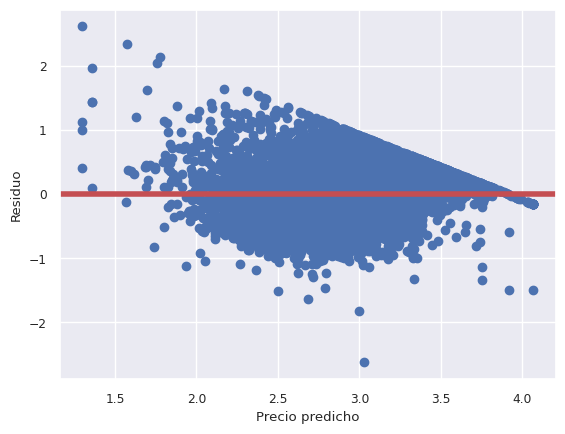

<ipython-input-281-d19fd07bebf1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_test-y_test_simple);


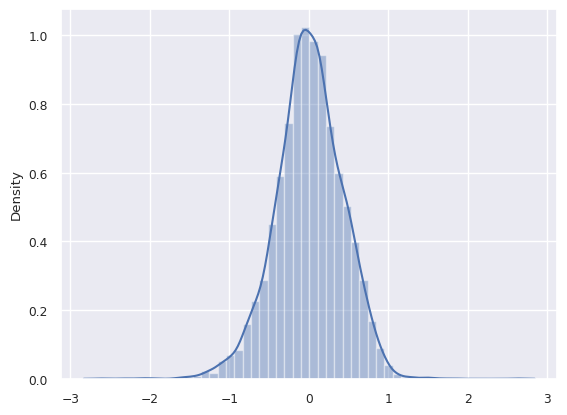

In [ ]:
plt.scatter(x = y_pred_test, y = y_test-y_pred_test)
plt.axhline(y=0, linewidth=4, color='r')

plt.xlabel('Precio predicho')
plt.ylabel('Residuo')

plt.show()

sns.distplot(y_pred_test-y_test_simple);

In [ ]:
# Crear nuevos datos para hacer predicciones
new_data = np.array([[2.617],[2.82],[3.12],[2.14],[1.88]])  # Nuevas instancias de X
new_data[:,0]=np.log(10*(new_data[:,0]))

In [ ]:
# Normalizar los nuevos datos
new_data_scaled = scaler_simple.transform(new_data)

In [ ]:
# Hacer predicciones con los nuevos datos
new_predictions = regr_simple_train.predict(new_data_scaled)

In [ ]:
# Mostrar las predicciones para los nuevos datos
predicciones_escaladas = np.exp(new_predictions)
predicciones_escaladas2 = (predicciones_escaladas)/10

#predicciones_escaladas2
predicciones_escaladas2
#print("Predicciones para nuevos datos:", new_predictions.flatten())

array([[1.41048788],
       [1.49893717],
       [1.6275235 ],
       [1.19735915],
       [1.07752164]])

## Regresión lineal multiple

In [ ]:
# Create linear regression object
from sklearn.linear_model import LinearRegression
regr_mult_train = LinearRegression()

# Train the model using the training sets
regr_mult_train.fit(X_train_scaled_multiple, y_train_multiple)


LinearRegression()

In [ ]:
import sklearn.metrics as metrics
# Make predictions using the testing set
y_pred = regr_mult_train.predict(X_test_scaled_multiple)

# The coefficients
print('Slope: \n', regr_mult_train.coef_)
print('Intercept: \n', regr_mult_train.intercept_)

from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f" %mean_squared_error(y_test_multiple, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' %r2_score(y_test_multiple, y_pred))
#R2
print('Coefficient of determination (R2): %.2f' % metrics.r2_score(y_test_multiple, y_pred))


Slope: 
 [[ 0.38594808  0.04562506 -0.07980771  0.0874314   0.00969116 -0.10736822
  -0.56630421 -0.51872431]]
Intercept: 
 [2.87562767]
Mean squared error: 0.11
Variance score: 0.66995
Coefficient of determination (R2): 0.67


In [ ]:
# Make predictions using the testing set
y_pred = regr_mult_train.predict(X_test_scaled_multiple)
print(y_pred)
print(y_test_multiple)


[[2.98420668]
 [3.19796013]
 [2.78177446]
 ...
 [2.73696485]
 [2.58995119]
 [2.50090618]]
[[2.61666564]
 [3.18345588]
 [2.99922616]
 ...
 [2.76694784]
 [2.84141491]
 [2.14358936]]


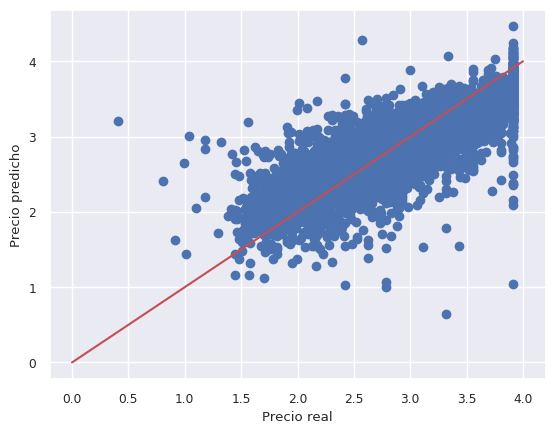

In [ ]:
x = np.linspace(0, 4, 3)
plt.scatter(x = y_test_multiple, y = y_pred)
plt.plot(x, x, 'r-')

plt.xlabel('Precio real')
plt.ylabel('Precio predicho')

plt.show()

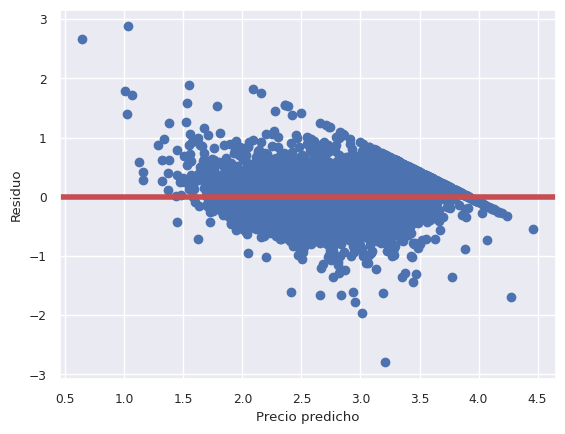

<ipython-input-290-8dab3f21d0b4>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_test_multiple);


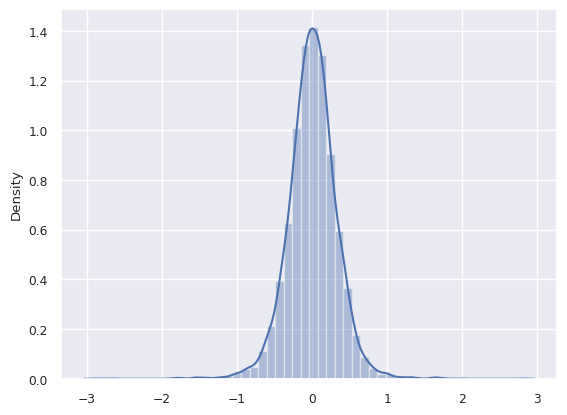

In [ ]:
plt.scatter(x = y_pred, y = y_test_multiple-y_pred)
plt.axhline(y=0, linewidth=4, color='r')

plt.xlabel('Precio predicho')
plt.ylabel('Residuo')

plt.show()

sns.distplot(y_pred-y_test_multiple);

Como podemos ver, nuestro modelo es bastante robusto en cuanto a predicciones para casas con un valor estimado entre los 100.000 y
350.000$, sin embargo infravalora el precio de las que se salen de este rango, para solucionar esto, podríamos entrenar otros dos modelos, solo con datos de casas cuyo valor cae en estos rangos, y así realizar predicciones más acordes a la realidad.

In [ ]:
# Crear nuevos datos para hacer predicciones
new_data = np.array([[5.5, 21 ,5.04 ,1.08 ,496 ,2.47 ,38.81 ,-121.10],
                     [7.25, 52, 8.29, 1.3, 357, 2.21, 39.5,-122.34],
                     [1.70, 18 , 5.82,1.1 , 1007, 1.92, 39.37,-121.82],
                     [1.7, 17 , 5.2,1.12 , 1007, 2.32, 39.43,-121.22],
                     [8.3, 41, 7, 1, 322, 2.56 ,37.88, -122.23]])  # Nuevas instancias de X

new_data[:,0]=np.log(10*(new_data[:,0]))
new_data[:,2]=np.log(10*(new_data[:,2]))
new_data[:,3]=np.log(10*(new_data[:,3]))
new_data[:,4]=np.log(new_data[:,4])
new_data[:,5]=np.log(10*(new_data[:,5]))

In [ ]:
# Normalizar los nuevos datos
new_data_scaled = scaler_multiple.transform(new_data)

In [ ]:
# Hacer predicciones con los nuevos datos
new_predictions = regr_mult_train.predict(new_data_scaled)

In [ ]:
# Mostrar las predicciones para los nuevos datos
predicciones_escaladas = np.exp(new_predictions)
predicciones_escaladas2 = (predicciones_escaladas)/10

#predicciones_escaladas2
predicciones_escaladas2
#print("Predicciones para nuevos datos:", new_predictions.flatten())

array([[1.70450225],
       [2.72762396],
       [0.72147957],
       [0.58700111],
       [3.7606317 ]])

## Regresión polinómica multiple

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(X_train_scaled_multiple)
X_poly_test = poly_reg.transform(X_test_scaled_multiple)

regr_mult_poly_train = LinearRegression()
regr_mult_poly_train.fit(X_poly_train, y_train_multiple)
print(X_train_scaled_multiple)
print(X_poly_train)

[[ 0.81376605  0.66264353  0.05819682 ... -0.30024111 -0.65353968
   0.65675917]
 [ 1.49023753 -0.52702997  1.08142178 ... -0.57187503 -0.69564613
   0.37248421]
 [ 0.08098399  0.66264353 -0.72638821 ...  0.6574578  -0.62079023
   0.56698813]
 ...
 [-0.1721021   0.18677413 -1.30396247 ... -1.6790653   0.44590636
  -1.16359802]
 [ 1.03011116  0.42470883 -0.49526669 ... -0.8504008  -0.93892781
   0.81635213]
 [-1.94463677 -1.08221094 -1.02479558 ...  0.6987893  -1.3225643
   1.99833749]]
[[ 1.          0.81376605  0.66264353 ...  0.42711412 -0.42921818
   0.43133261]
 [ 1.          1.49023753 -0.52702997 ...  0.48392354 -0.2591172
   0.13874449]
 [ 1.          0.08098399  0.66264353 ...  0.38538051 -0.35198069
   0.32147554]
 ...
 [ 1.         -0.1721021   0.18677413 ...  0.19883248 -0.51885576
   1.35396036]
 [ 1.          1.03011116  0.42470883 ...  0.88158543 -0.76649572
   0.6664308 ]
 [ 1.         -1.94463677 -1.08221094 ...  1.74917632 -2.64292982
   3.99335271]]


In [ ]:
import sklearn.metrics as metrics
# Make predictions using the testing set
y_pred = regr_mult_poly_train.predict(X_poly_test)

# The coefficients
print('Slope: \n', regr_mult_poly_train.coef_)
print('Intercept: \n', regr_mult_poly_train.intercept_)

from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f" %mean_squared_error(y_test_multiple, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' %r2_score(y_test_multiple, y_pred))
#R2
print('Coefficient of determination (R2): %.2f' % metrics.r2_score(y_test_multiple, y_pred))


Slope: 
 [[-4.75750125e-17  3.75642020e-01  4.44377056e-02 -4.33506580e-02
   6.48447785e-02  3.19005951e-02 -1.41663581e-01 -7.26832778e-01
  -6.53596731e-01  1.72801072e-02  2.16491832e-02  3.95252035e-02
  -1.14112001e-02  5.21369556e-02 -2.00719622e-02 -7.15046469e-02
  -6.91293280e-02  5.03701925e-03 -2.08384369e-02  1.77466168e-02
   1.17272723e-02 -2.51780034e-02 -1.30201620e-01 -1.13030421e-01
   1.67657370e-02 -1.46644770e-02 -5.22059811e-02 -3.67937416e-03
   1.52350913e-01  1.36945549e-01  4.76453015e-04  3.28063161e-02
   1.51622015e-03 -6.21812400e-02 -4.54445936e-02  6.99550198e-03
  -9.29911089e-03  1.44798302e-03  3.18637151e-04  1.25628217e-02
  -2.21942938e-02 -1.42604522e-02  1.25953099e-01  1.57587865e-01
   3.30136217e-02]]
Intercept: 
 [2.76278367]
Mean squared error: 0.09
Variance score: 0.73062
Coefficient of determination (R2): 0.73


In [ ]:
# Make predictions using the testing set
y_pred = regr_mult_poly_train.predict(X_poly_test)
print(y_pred)
print(y_test_multiple)

[[2.94886533]
 [3.18431073]
 [2.70421738]
 ...
 [2.66942662]
 [2.64415358]
 [2.40823256]]
[[2.61666564]
 [3.18345588]
 [2.99922616]
 ...
 [2.76694784]
 [2.84141491]
 [2.14358936]]


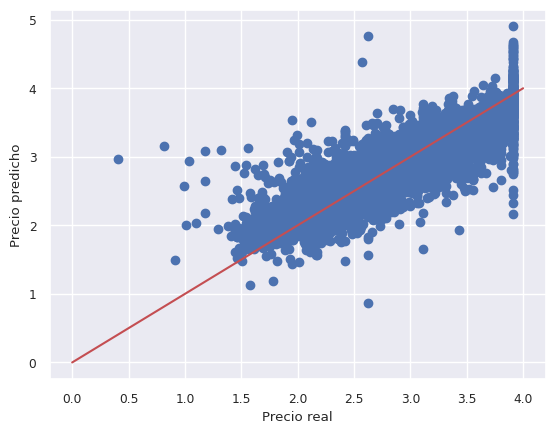

In [ ]:
x = np.linspace(0, 4, 3)
plt.scatter(x = y_test_multiple, y = y_pred)
plt.plot(x, x, 'r-')

plt.xlabel('Precio real')
plt.ylabel('Precio predicho')

plt.show()

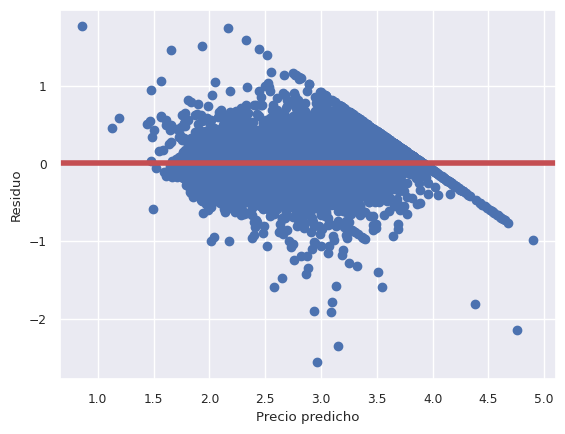

<ipython-input-67-8dab3f21d0b4>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_test_multiple);


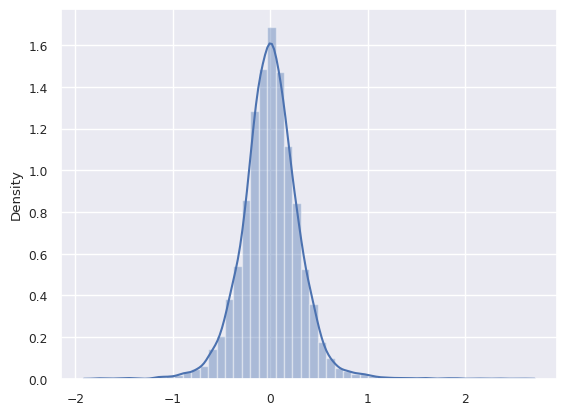

In [ ]:
plt.scatter(x = y_pred, y = y_test_multiple-y_pred)
plt.axhline(y=0, linewidth=4, color='r')

plt.xlabel('Precio predicho')
plt.ylabel('Residuo')

plt.show()

sns.distplot(y_pred-y_test_multiple);

In [ ]:
# Crear nuevos datos para hacer predicciones
new_data = np.array([[5.5, 21 ,5.04 ,1.08 ,496 ,2.47 ,38.81 ,-121.10],
                     [7.25, 52, 8.29, 1.3, 357, 2.21, 39.5,-122.34],
                     [1.70, 18 , 5.82,1.1 , 1007, 1.92, 39.37,-121.82],
                     [1.7, 17 , 5.2,1.12 , 1007, 2.32, 39.43,-121.22],
                     [8.3, 41, 7, 1, 322, 2.56 ,37.88, -122.23]])  # Nuevas instancias de X

new_data[:,0]=np.log(10*(new_data[:,0]))
new_data[:,2]=np.log(10*(new_data[:,2]))
new_data[:,3]=np.log(10*(new_data[:,3]))
new_data[:,4]=np.log(new_data[:,4])
new_data[:,5]=np.log(10*(new_data[:,5]))

In [ ]:
new_data

array([[   4.00733319,   21.        ,    3.91999118,    2.37954613,
           6.20657593,    3.20680324,   38.81      , -121.1       ],
       [   4.28358656,   52.        ,    4.41763506,    2.56494936,
           5.87773578,    3.09557761,   39.5       , -122.34      ],
       [   2.83321334,   18.        ,    4.06388535,    2.39789527,
           6.91473089,    2.95491028,   39.37      , -121.82      ],
       [   2.83321334,   17.        ,    3.95124372,    2.41591378,
           6.91473089,    3.14415228,   39.43      , -121.22      ],
       [   4.41884061,   41.        ,    4.24849524,    2.30258509,
           5.77455155,    3.24259235,   37.88      , -122.23      ]])

In [ ]:
# Normalizar los nuevos datos
new_data_scaled = scaler_multiple.transform(new_data)

In [ ]:
# Escalar polinómicamente los datos
new_data_scaled_poly = poly_reg.transform(new_data_scaled)

In [ ]:
# Hacer predicciones con los nuevos datos
new_predictions = regr_mult_poly_train.predict(new_data_scaled_poly)

In [ ]:
# Mostrar las predicciones para los nuevos datos
predicciones_escaladas = np.exp(new_predictions)
predicciones_polinomico = (predicciones_escaladas)/10

#predicciones_escaladas2
predicciones_escaladas2
#print("Predicciones para nuevos datos:", new_predictions.flatten())

array([1.81317704, 3.67123506, 0.84188033, 0.7728773 , 4.26419998])

## Máquina de soporte vectorial

In [ ]:
from sklearn.svm import SVR
SVRregression = SVR(kernel = "rbf")
SVRregression.fit(X_train_scaled_multiple, y_train_multiple)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
import sklearn.metrics as metrics
# Make predictions using the testing set
y_pred = SVRregression.predict(X_test_scaled_multiple)

# The coefficients
print('Intercept: \n', SVRregression.intercept_)

from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f" %mean_squared_error(y_test_multiple, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' %r2_score(y_test_multiple, y_pred))
#R2
print('Coefficient of determination (R2): %.2f' % metrics.r2_score(y_test_multiple, y_pred))


Intercept: 
 [2.83411512]
Mean squared error: 0.07
Variance score: 0.79267
Coefficient of determination (R2): 0.79


In [ ]:
# Make predictions using the testing set
y_pred = SVRregression.predict(X_test_scaled_multiple)
print(y_pred)
print(y_test_multiple)


[2.69524437 3.22461267 2.64461659 ... 2.6493345  2.58419745 2.47061763]
[[2.61666564]
 [3.18345588]
 [2.99922616]
 ...
 [2.76694784]
 [2.84141491]
 [2.14358936]]


In [ ]:
# Crear nuevos datos para hacer predicciones
new_data = np.array([[5.5, 21 ,5.04 ,1.08 ,496 ,2.47 ,38.81 ,-121.10],
                     [7.25, 52, 8.29, 1.3, 357, 2.21, 39.5,-122.34],
                     [1.70, 18 , 5.82,1.1 , 1007, 1.92, 39.37,-121.82],
                     [1.7, 17 , 5.2,1.12 , 1007, 2.32, 39.43,-121.22],
                     [8.3, 41, 7, 1, 322, 2.56 ,37.88, -122.23]])  # Nuevas instancias de X

new_data[:,0]=np.log(10*(new_data[:,0]))
new_data[:,2]=np.log(10*(new_data[:,2]))
new_data[:,3]=np.log(10*(new_data[:,3]))
new_data[:,4]=np.log(new_data[:,4])
new_data[:,5]=np.log(10*(new_data[:,5]))

In [ ]:
# Normalizar los nuevos datos
new_data_scaled = scaler_multiple.transform(new_data)

In [ ]:
# Hacer predicciones con los nuevos datos
new_predictions = SVRregression.predict(new_data_scaled)

In [ ]:
# Mostrar las predicciones para los nuevos datos
predicciones_escaladas = np.exp(new_predictions)
predicciones_escaladas2 = (predicciones_escaladas)/10

#predicciones_escaladas2
predicciones_escaladas2
#print("Predicciones para nuevos datos:", new_predictions.flatten())

array([1.48714945, 3.12324334, 1.04080816, 0.87479918, 4.13022067])

## Árboles de decision

In [ ]:
# Create a Regression Decission Tree object
from sklearn.tree import DecisionTreeRegressor
Treeregression = DecisionTreeRegressor(random_state = 0)
Treeregression.fit(X_train_scaled_multiple, y_train_multiple)

DecisionTreeRegressor(random_state=0)

In [ ]:
import sklearn.metrics as metrics
# Make predictions using the testing set
y_pred = Treeregression.predict(X_test_scaled_multiple)

from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f" %mean_squared_error(y_test_multiple, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' %r2_score(y_test_multiple, y_pred))
#R2
print('Coefficient of determination (R2): %.2f' % metrics.r2_score(y_test_multiple, y_pred))


Mean squared error: 0.12
Variance score: 0.62817
Coefficient of determination (R2): 0.63


In [ ]:
# Make predictions using the testing set
y_pred = Treeregression.predict(X_test_scaled_multiple)
print(y_pred)
print(y_test_multiple)

[2.77695418 3.49499126 2.77446197 ... 2.73631367 2.71997877 1.93152141]
[[2.61666564]
 [3.18345588]
 [2.99922616]
 ...
 [2.76694784]
 [2.84141491]
 [2.14358936]]


In [ ]:
# Crear nuevos datos para hacer predicciones
new_data = np.array([[5.5, 21 ,5.04 ,1.08 ,496 ,2.47 ,38.81 ,-121.10],
                     [7.25, 52, 8.29, 1.3, 357, 2.21, 39.5,-122.34],
                     [1.70, 18 , 5.82,1.1 , 1007, 1.92, 39.37,-121.82],
                     [1.7, 17 , 5.2,1.12 , 1007, 2.32, 39.43,-121.22],
                     [8.3, 41, 7, 1, 322, 2.56 ,37.88, -122.23]])  # Nuevas instancias de X

new_data[:,0]=np.log(10*(new_data[:,0]))
new_data[:,2]=np.log(10*(new_data[:,2]))
new_data[:,3]=np.log(10*(new_data[:,3]))
new_data[:,4]=np.log(new_data[:,4])
new_data[:,5]=np.log(10*(new_data[:,5]))

In [ ]:
# Normalizar los nuevos datos
new_data_scaled = scaler_multiple.transform(new_data)

In [ ]:
# Hacer predicciones con los nuevos datos
new_predictions = Treeregression.predict(new_data_scaled)

In [ ]:
# Mostrar las predicciones para los nuevos datos
predicciones_escaladas = np.exp(new_predictions)
predicciones_escaladas2 = (predicciones_escaladas)/10

#predicciones_escaladas2
predicciones_escaladas2
#print("Predicciones para nuevos datos:", new_predictions.flatten())

array([2.394, 2.287, 1.05 , 0.923, 4.526])

## Bosques aleatorios

In [ ]:
# Create a Regression Random Forest object
from sklearn.ensemble import RandomForestRegressor
RandForestregression = RandomForestRegressor(n_estimators = 10, random_state = 0)
RandForestregression.fit(X_train_scaled_multiple, y_train_multiple)

<ipython-input-51-41ff314f0e46>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandForestregression.fit(X_train_scaled_multiple, y_train_multiple)


RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
import sklearn.metrics as metrics
# Make predictions using the testing set
y_pred = RandForestregression.predict(X_test_scaled_multiple)

from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f" %mean_squared_error(y_test_multiple, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' %r2_score(y_test_multiple, y_pred))
#R2
print('Coefficient of determination (R2): %.2f' % metrics.r2_score(y_test_multiple, y_pred))


Mean squared error: 0.07
Variance score: 0.79622
Coefficient of determination (R2): 0.80


In [ ]:
# Make predictions using the testing set
y_pred = RandForestregression.predict(X_test_scaled_multiple)
print(y_pred)
print(y_test_multiple)

[2.65741891 3.28775998 2.56173363 ... 2.73894077 2.62922072 2.33894975]
[[2.61666564]
 [3.18345588]
 [2.99922616]
 ...
 [2.76694784]
 [2.84141491]
 [2.14358936]]


In [ ]:
# Crear nuevos datos para hacer predicciones
new_data = np.array([[5.5, 21 ,5.04 ,1.08 ,496 ,2.47 ,38.81 ,-121.10],
                     [7.25, 52, 8.29, 1.3, 357, 2.21, 39.5,-122.34],
                     [1.70, 18 , 5.82,1.1 , 1007, 1.92, 39.37,-121.82],
                     [1.7, 17 , 5.2,1.12 , 1007, 2.32, 39.43,-121.22],
                     [8.3, 41, 7, 1, 322, 2.56 ,37.88, -122.23]])  # Nuevas instancias de X

new_data[:,0]=np.log(10*(new_data[:,0]))
new_data[:,2]=np.log(10*(new_data[:,2]))
new_data[:,3]=np.log(10*(new_data[:,3]))
new_data[:,4]=np.log(new_data[:,4])
new_data[:,5]=np.log(10*(new_data[:,5]))

In [ ]:
# Normalizar los nuevos datos
new_data_scaled = scaler_multiple.transform(new_data)

In [ ]:
# Hacer predicciones con los nuevos datos
new_predictions = RandForestregression.predict(new_data_scaled)

In [ ]:
# Mostrar las predicciones para los nuevos datos
predicciones_escaladas = np.exp(new_predictions)
predicciones_escaladas2 = (predicciones_escaladas)/10

#predicciones_escaladas2
predicciones_escaladas2
#print("Predicciones para nuevos datos:", new_predictions.flatten())

array([1.81317704, 3.67123506, 0.84188033, 0.7728773 , 4.26419998])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_linearReg=regr_simple_train.predict(X_test_scaled_simple)
y_pred_lineal_poly=regr_mult_poly_train.predict(poly_reg.fit_transform(X_test_scaled_multiple))
y_pred_SVR=SVRregression.predict(scaler_multiple.transform(X_test_scaled_multiple))
y_pred_Treeregression=Treeregression.predict(X_test_scaled_multiple)
y_pred_rndForest=RandForestregression.predict(X_test_scaled_multiple)

# The mean absolute error
print("MEAN ABSOLUTE ERROR")
print("   MAE (Simple Linear Regression): %.2f" % mean_absolute_error(y_test_simple, y_pred_linearReg))
print("   MAE (Polynomial Linear Regression): %.2f" % mean_absolute_error(y_test_multiple, y_pred_lineal_poly))
print("   MAE (Support Vector Machine SVR): %.2f" % mean_absolute_error(y_test_multiple, y_pred_SVR))
print("   MAE (Regression Decission Tree): %.2f" % mean_absolute_error(y_test_multiple, y_pred_Treeregression))
print("   MAE (Regression Random Forests): %.2f" % mean_absolute_error(y_test_multiple, y_pred_rndForest))
print(" ")
# The mean squared error
print("MEAN SQUARED ERROR")
print("   MSE (Simple Linear Regression): %.2f" % mean_squared_error(y_test_simple, y_pred_linearReg))
print("   MSE (Polynomial Linear Regression): %.2f" % mean_squared_error(y_test_multiple, y_pred_lineal_poly))
print("   MSE (Support Vector Machine SVR): %.2f" % mean_squared_error(y_test_multiple, y_pred_SVR))
print("   MSE (Regression Decission Tree): %.2f" % mean_squared_error(y_test_multiple, y_pred_Treeregression))
print("   MSE (Regression Random Forests): %.2f" % mean_squared_error(y_test_multiple, y_pred_rndForest))
print(" ")

# Explained variance score-->R2:
print("EXPLAINED VARIANCE (R2)")
print("   R2 (Simple Linear Regression): %.5f" % r2_score(y_test_simple, y_pred_linearReg))
print("   R2 (Polynomial Linear Regression): %.5f" % r2_score(y_test_multiple, y_pred_lineal_poly))
print("   R2 (Support Vector Machine SVR): %.5f" % r2_score(y_test_multiple, y_pred_SVR))
print("   R2 (Regression Decission Tree): %.5f" % r2_score(y_test_multiple, y_pred_Treeregression))
print("   R2 (Regression Random Forests): %.5f" % r2_score(y_test_multiple, y_pred_rndForest))
print(" ")

# The R2-adj score:
n=X_train_scaled_multiple.shape[0]
k=X_train_scaled_multiple.shape[1]
print("R2-ADJUSTED")
print("   R2-ADJ (Simple Linear Regression): %.5f" % (1-(1-r2_score(y_test_simple, y_pred_linearReg))*((n-1)/(n-k-1))) )
print("   R2-ADJ (Polynomial Linear Regression): %.5f" % (1-(1-r2_score(y_test_multiple, y_pred_lineal_poly))*((n-1)/(n-4-1))) )
print("   R2-ADJ (Support Vector Machine SVR): %.5f" % (1-(1-r2_score(y_test_multiple, y_pred_SVR))*((n-1)/(n-k-1))) )
print("   R2-ADJ (Regression Decission Tree): %.5f" % (1-(1-r2_score(y_test_multiple, y_pred_Treeregression))*((n-1)/(n-k-1))) )
print("   R2-ADJ (Regression Random Forests): %.5f" % (1-(1-r2_score(y_test_multiple, y_pred_rndForest))*((n-1)/(n-k-1))) )


MEAN ABSOLUTE ERROR
   MAE (Simple Linear Regression): 0.33
   MAE (Polynomial Linear Regression): 0.22
   MAE (Support Vector Machine SVR): 0.46
   MAE (Regression Decission Tree): 0.24
   MAE (Regression Random Forests): 0.18
 
MEAN SQUARED ERROR
   MSE (Simple Linear Regression): 0.18
   MSE (Polynomial Linear Regression): 0.09
   MSE (Support Vector Machine SVR): 0.33
   MSE (Regression Decission Tree): 0.12
   MSE (Regression Random Forests): 0.07
 
EXPLAINED VARIANCE (R2)
   R2 (Simple Linear Regression): 0.45192
   R2 (Polynomial Linear Regression): 0.73062
   R2 (Support Vector Machine SVR): -0.00450
   R2 (Regression Decission Tree): 0.62817
   R2 (Regression Random Forests): 0.79622
 
R2-ADJUSTED
   R2-ADJ (Simple Linear Regression): 0.45160
   R2-ADJ (Polynomial Linear Regression): 0.73054
   R2-ADJ (Support Vector Machine SVR): -0.00508
   R2-ADJ (Regression Decission Tree): 0.62795
   R2-ADJ (Regression Random Forests): 0.79610


## Generar predicciones, aplicando la media de los resultados obtenidos por varios algoritmos.

In [ ]:
y_pred_linearReg_flatten = y_pred_linearReg.flatten()
y_pred_lineal_poly_flatten = y_pred_lineal_poly.flatten()
print( np.mean([y_pred_linearReg_flatten, y_pred_lineal_poly_flatten, y_pred_SVR, y_pred_Treeregression, y_pred_rndForest ]) )
print( np.mean([y_pred_lineal_poly_flatten, y_pred_SVR, y_pred_rndForest ]) )

2.867596990706818
2.862243204814555
